The dataset for this project is a relational set of files describing customers' orders over time. The goal of this peoject is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 **Instacart** users. For each user, we are provided between 4 and 100 of their orders, with the sequence of products purchased in each order. We are also provided the week and hour of day the order was placed, and a relative measure of time between orders.

In [5]:
#Importing useful libraries
import pandas as pd
import numpy as np
import datetime
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
aisles=pd.read_csv('aisles.csv')
departments=pd.read_csv('departments.csv')
products=pd.read_csv('products.csv')
order_products_prior=pd.read_csv('order_products__prior.csv')
order_products_train=pd.read_csv('order_products__train.csv')
orders=pd.read_csv('orders.csv')



In [7]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
aisles.info()  #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [9]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
departments.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [11]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
products.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [14]:
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [15]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [16]:
order_products_train.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [17]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


### **Checking for missing values in Data frame order_products__prior and orders**

In [19]:
order_products_prior.isnull().sum() #No missing Values

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [20]:
missing_values = orders.isnull().sum() #MISSING VALUES

In [21]:
percentage = missing_values/orders.isnull().count()
percentage

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64

### Values are missing because for every user’s 1st order ( order_number = 1) the days_since_prior_order is Nan, which makes sense. We can impute 0 here. or since Missing values are only 6% of total values, we can remove these rows and carry on with our analysis.  I will use the second approach.

In [22]:
orders= orders[orders['days_since_prior_order'].notnull()]

In [23]:
orders.isnull().sum() #DataFrame after removing the null values

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

## Exploratory Data Analyais

### Analyzing the dataframe *orders*

In [24]:
#Columm eval_set has 3 values- prior,train,test.
orders['eval_set'].value_counts()

prior    3008665
train     131209
test       75000
Name: eval_set, dtype: int64

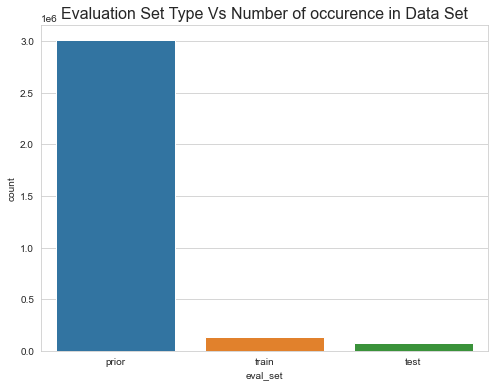

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
ax= sns.countplot(x='eval_set', data= orders)
ax.set_title('Evaluation Set Type Vs Number of occurence in Data Set', fontsize=16)

plt.show()

**Now let us check order_dow distribution**

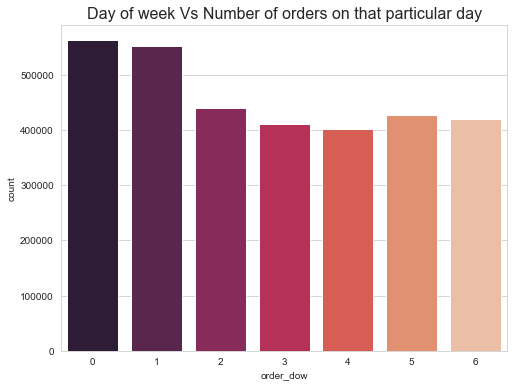

In [26]:
plt.figure(figsize=(8,6))
ax= sns.countplot(x='order_dow', data= orders, palette='rocket')
ax.set_title('Day of week Vs Number of orders on that particular day', fontsize=16)

plt.show()

From the graph above we can see that maximum number of orders is on Sunday, followed by monday. which makes sense as people will want to buy groceries either at the weekend or start of the week. Mid-week has less number of orders with minimum orders on thursday. 

**Checking order_hour_of_day distribution**

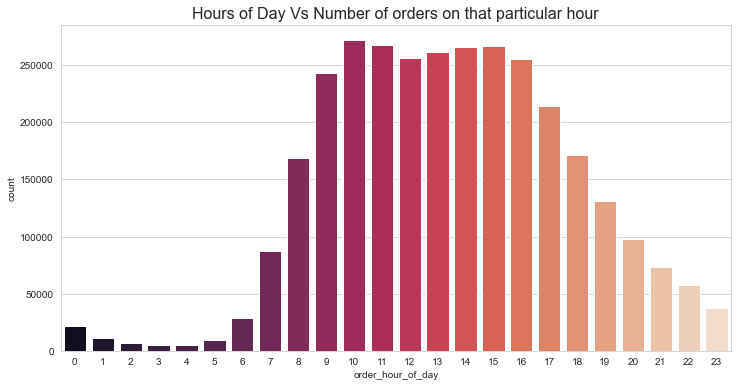

In [27]:
plt.figure(figsize=(12,6))
ax= sns.countplot(x='order_hour_of_day', data= orders, palette='rocket')
ax.set_title('Hours of Day Vs Number of orders on that particular hour', fontsize=16)

plt.show()

The above graph clearly depicats that maximum number of orders are in morning 10-11 am or in evening 3-4pm. At night between 1-5am orders are the least as that is when people are sleeping.

**Days_since_prior_order Distribution**

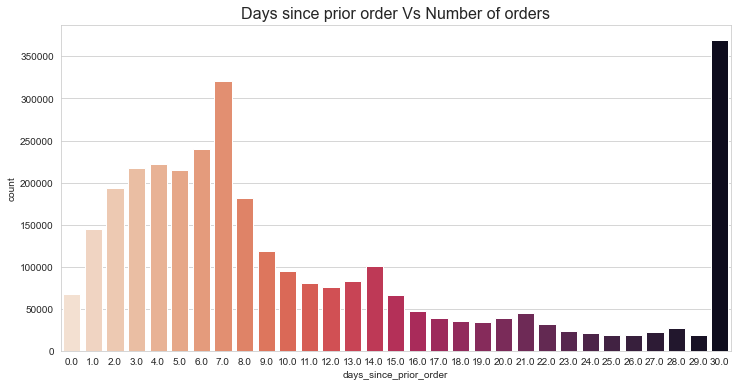

In [28]:
plt.figure(figsize=(12,6))
ax= sns.countplot(x='days_since_prior_order', data= orders, palette='rocket_r')
ax.set_title('Days since prior order Vs Number of orders', fontsize=16)

plt.show()

From the graph it is clear that there is a peak on 7th day, then local peaks at day 14,day 21 and day 28. Then there is a global peak on day 30 meaning monthly peak. 

**Now we will group orders according to day of week and hour of day for better visualization.**

In [29]:
orders_grouped = orders.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()
orders_grouped

,order_dow,order_hour_of_day,order_number
0,0,0,3690
1,0,1,2245
2,0,2,1296
3,0,3,902
4,0,4,756
...,...,...,...
163,6,19,17128
164,6,20,12486
165,6,21,9842
166,6,22,7973


In [30]:
#pivoting the data set for better visualization 
#This table shows no. of orders on all days of week on a particular hour of day .
orders_grouped= orders_grouped.pivot('order_dow','order_hour_of_day', 'order_number')
orders_grouped

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3690,2245,1296,902,756,1093,3143,11762,26514,38363,...,51038,50427,46136,37056,27588,21126,17062,13577,10543,6460
1,3429,1723,1020,696,756,1523,5078,15725,32382,49136,...,43986,43590,41930,34407,27046,20687,15223,11196,8417,5245
2,2843,1472,878,683,696,1317,4511,12606,23343,34351,...,34946,35249,35239,30092,24797,18794,14045,10032,7649,4994
3,2760,1398,893,608,676,1279,4345,11775,21338,30578,...,32665,33878,33156,28483,23399,17991,12977,9681,7735,4867
4,2476,1415,841,644,695,1253,4184,11893,20682,29670,...,31696,32244,32034,27697,22935,18140,13326,10198,8275,5305
5,2987,1568,952,780,846,1502,4632,12770,22789,32342,...,35351,35379,33770,28131,22806,17517,12500,8945,7013,4926
6,3080,1815,1130,804,739,1056,3063,10696,21696,29012,...,36325,35608,33194,28342,22562,17128,12486,9842,7973,5710


<AxesSubplot:xlabel='order_hour_of_day', ylabel='order_dow'>

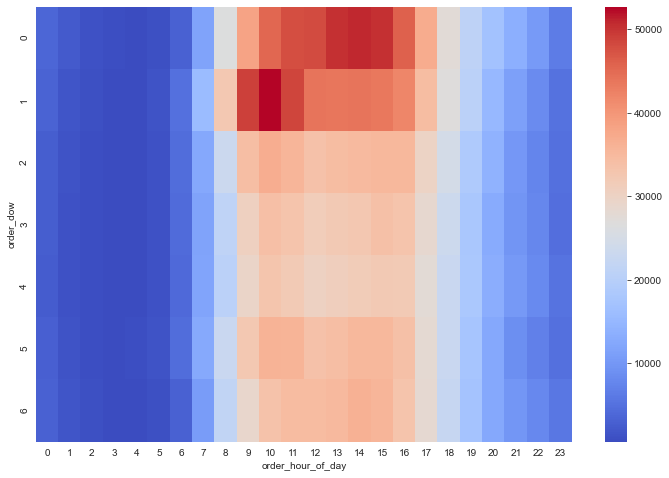

In [31]:
#Heatmap for visualization
plt.figure(figsize=(12,8))
sns.heatmap(orders_grouped, cmap='coolwarm')

From the heatmap above it is clear that peak orders are either on sunday 2 PM or on monday 10 AM.

<AxesSubplot:>

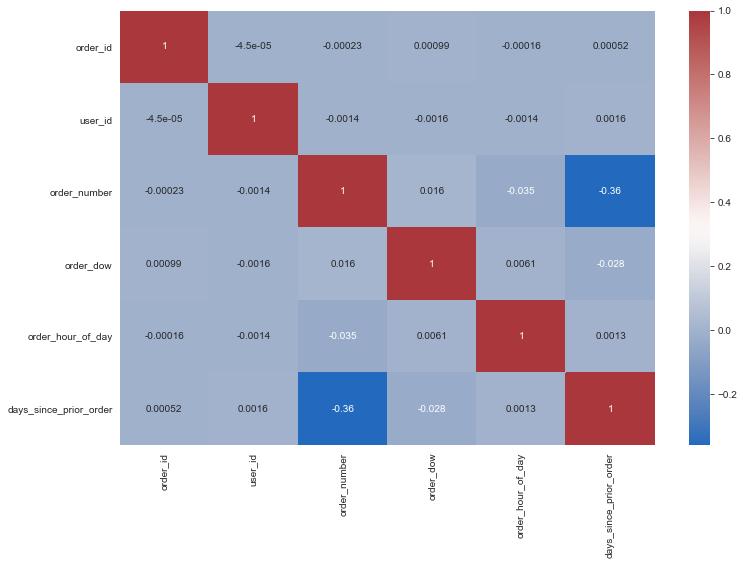

In [32]:
plt.figure(figsize=(12,8))

sns.heatmap( orders.corr(), cmap='vlag', annot=True)

###  Merging orders_products_prior with dataframes  departments ,products and aisles and Analyzing it

In [33]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [34]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [66]:
#percentage of reordered products in order_products_prior
order_products_prior['reordered'].sum()

19126536

In [67]:
len(order_products_prior)

32434489

In [36]:
#percentage of reordered products in order_products_train
order_products_train['reordered'].sum()/len(order_products_train)

0.5985944127509629

**Almost 60% products are reordered in both order_products_prior and order_products_train dataframe.**

In [143]:
#concat train order and prior orders
prior_train = pd.concat([order_products_prior, order_products_train]).sort_values(by=['order_id'])


In [144]:
prior_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 32434487
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 1.3 GB


In [145]:
#Merging with products dataframe
prior_train_orders = pd.merge(prior_train, products, on='product_id', how='left').sort_values(by=['order_id'])

In [146]:
prior_train_orders.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,10246,3,0,Organic Celery Hearts,83,4
2,1,49683,4,0,Cucumber Kirby,83,4
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15
4,1,13176,6,0,Bag of Organic Bananas,24,4


In [152]:
#merge with aisle and department

prior_train_orders = pd.merge(prior_train_orders, aisles, on='aisle_id', how='left')
prior_train_orders = pd.merge(prior_train_orders,departments, on='department_id', how='left')


In [153]:
prior_train_orders.head(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
2,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
4,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce


In [154]:
#Merging with dataframe orders
prior_train_orders = pd.merge(prior_train_orders, orders, on='order_id',how='left').sort_values(by=['order_id'])

In [155]:
prior_train_orders['eval_set'].value_counts()

prior    30356421
train     1384617
Name: eval_set, dtype: int64

In [156]:
col_order = ['user_id','order_id','product_id','aisle_id','department_id','add_to_cart_order',
 'reordered','product_name','aisle','department','eval_set','order_number','order_dow','order_hour_of_day','days_since_prior_order']

prior_train_orders = prior_train_orders[col_order]
prior_train_orders.head()

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,112108.0,1,49302,120,16,1,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4.0,4.0,10.0,9.0
1,112108.0,1,10246,83,4,3,0,Organic Celery Hearts,fresh vegetables,produce,train,4.0,4.0,10.0,9.0
2,112108.0,1,49683,83,4,4,0,Cucumber Kirby,fresh vegetables,produce,train,4.0,4.0,10.0,9.0
3,112108.0,1,43633,95,15,5,1,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,train,4.0,4.0,10.0,9.0
4,112108.0,1,13176,24,4,6,0,Bag of Organic Bananas,fresh fruits,produce,train,4.0,4.0,10.0,9.0


### Exploratory data analysis using the merged dataframe prior_train_orders

In [62]:
#Distribution of target Variable
target_var= prior_train_orders.groupby(['eval_set'])['reordered'].aggregate(['count','sum']).reset_index()
target_var

,eval_set,count,sum
0,prior,30356421,19126536
1,train,1384617,828824


In [63]:
target_var['reordered_percentage']= target_var['sum']/target_var['count']
target_var

,eval_set,count,sum,reordered_percentage
0,prior,30356421,19126536,0.630066
1,train,1384617,828824,0.598594


<AxesSubplot:xlabel='eval_set', ylabel='reordered_percentage'>

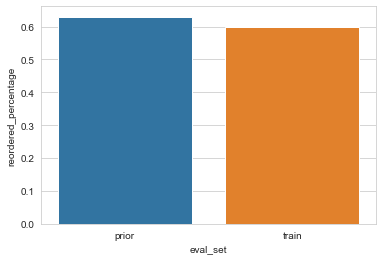

In [65]:
sns.barplot(x='eval_set', y='reordered_percentage' , data=target_var)

In [ ]:
#How many orders were placed by every user

In [70]:
orders_per_user= orders.groupby(['user_id']) ['order_id'].aggregate(lambda group : len(group.unique())).reset_index()
orders_per_user
#here order_id represents - unique number of orders for each user. we will plot this in a bar plot.

,user_id,order_id
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4
...,...,...
206204,206205,3
206205,206206,67
206206,206207,16
206207,206208,49


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '8'),
  Text(6, 0, '9'),
  Text(7, 0, '10'),
  Text(8, 0, '11'),
  Text(9, 0, '12'),
  Text(10, 0, '13'),
  Text(11, 0, '14'),
  Text(12, 0, '15'),
  Text(13, 0, '16'),
  Text(14, 0, '17'),
  Text(15, 0, '18'),
  Text(16, 0, '19'),
  Text(17, 0, '20'),
  Text(18, 0, '21'),
  Text(19, 0, '22'),
  Text(20, 0, '23'),
  Text(21, 0, '24'),
  Text(22, 0, '25'),
  Text(23, 0, '26'),
  Text(24, 0, '27'),
  Text(25, 0, '28'),
  Text(26, 0, '29'),
  Text(27, 0

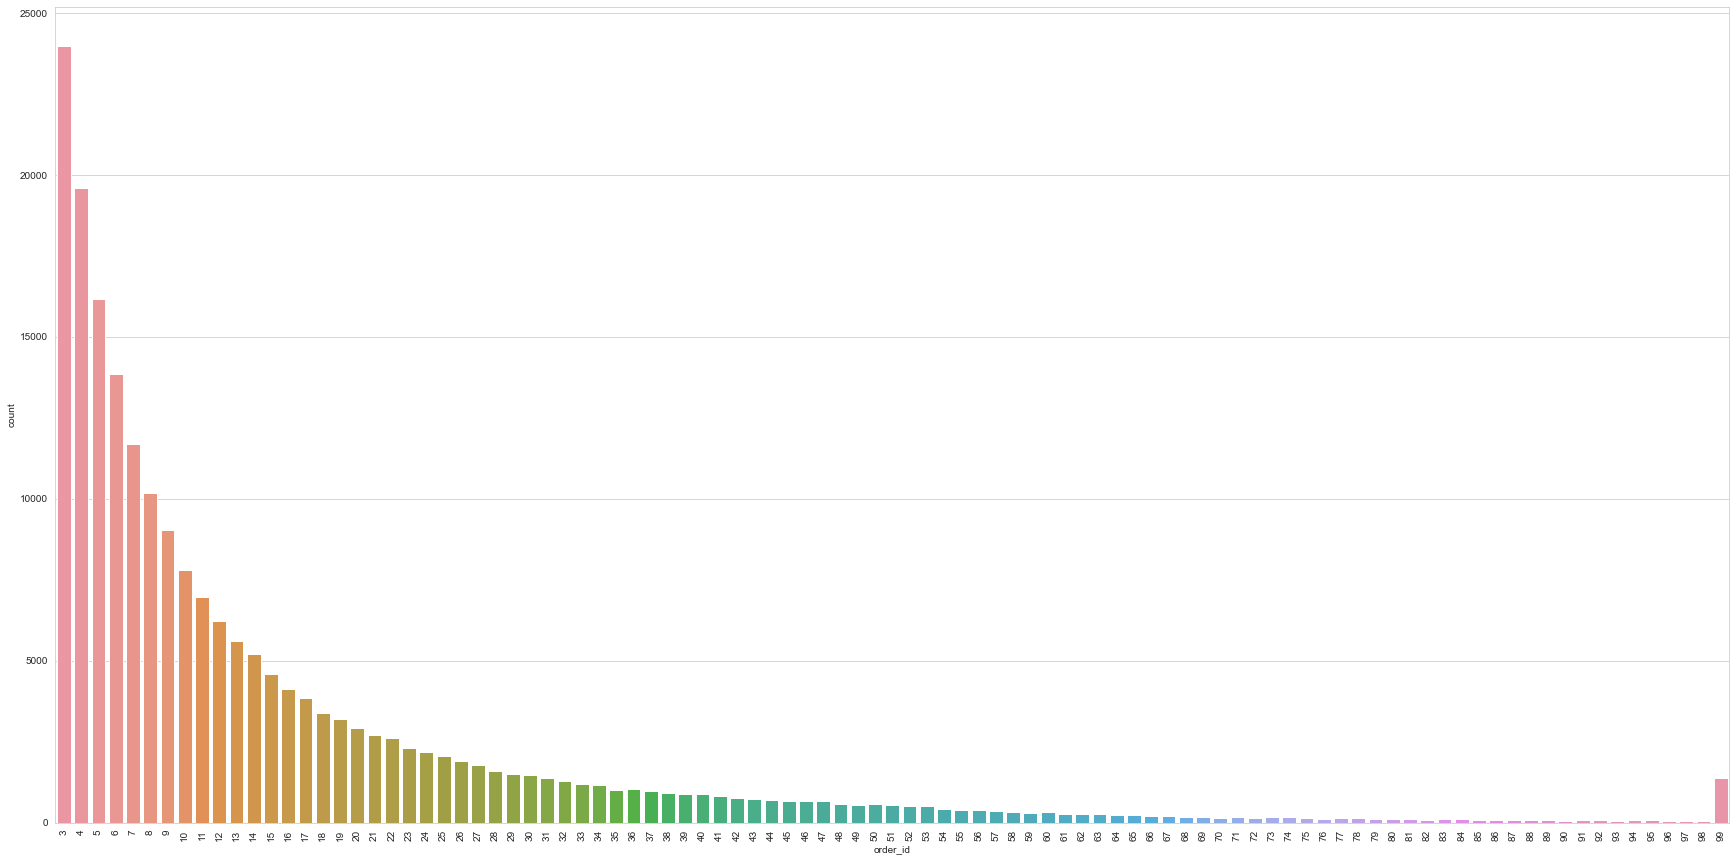

In [91]:
plt.figure(figsize=(30,15))
sns.countplot(x='order_id',data=orders_per_user)
plt.xticks(rotation='vertical')

From the graph above we can see that number of orders per user are between 4-100. and very few users have places more than 60 orders.

In [ ]:
#most frequently ordered / reordered products

In [85]:
reordered_products=prior_train_orders['product_name'].value_counts().reset_index().head(20)
reordered_products.columns=['product_name','frequency']
reordered_products

,product_name,frequency
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Banana'),
  Text(1, 0, 'Bag of Organic Bananas'),
  Text(2, 0, 'Organic Strawberries'),
  Text(3, 0, 'Organic Baby Spinach'),
  Text(4, 0, 'Organic Hass Avocado'),
  Text(5, 0, 'Organic Avocado'),
  Text(6, 0, 'Large Lemon'),
  Text(7, 0, 'Strawberries'),
  Text(8, 0, 'Limes'),
  Text(9, 0, 'Organic Whole Milk'),
  Text(10, 0, 'Organic Raspberries'),
  Text(11, 0, 'Organic Yellow Onion'),
  Text(12, 0, 'Organic Garlic'),
  Text(13, 0, 'Organic Zucchini'),
  Text(14, 0, 'Organic Blueberries'),
  Text(15, 0, 'Cucumber Kirby'),
  Text(16, 0, 'Organic Fuji Apple'),
  Text(17, 0, 'Organic Lemon'),
  Text(18, 0, 'Organic Grape Tomatoes'),
  Text(19, 0, 'Apple Honeycrisp Organic')])

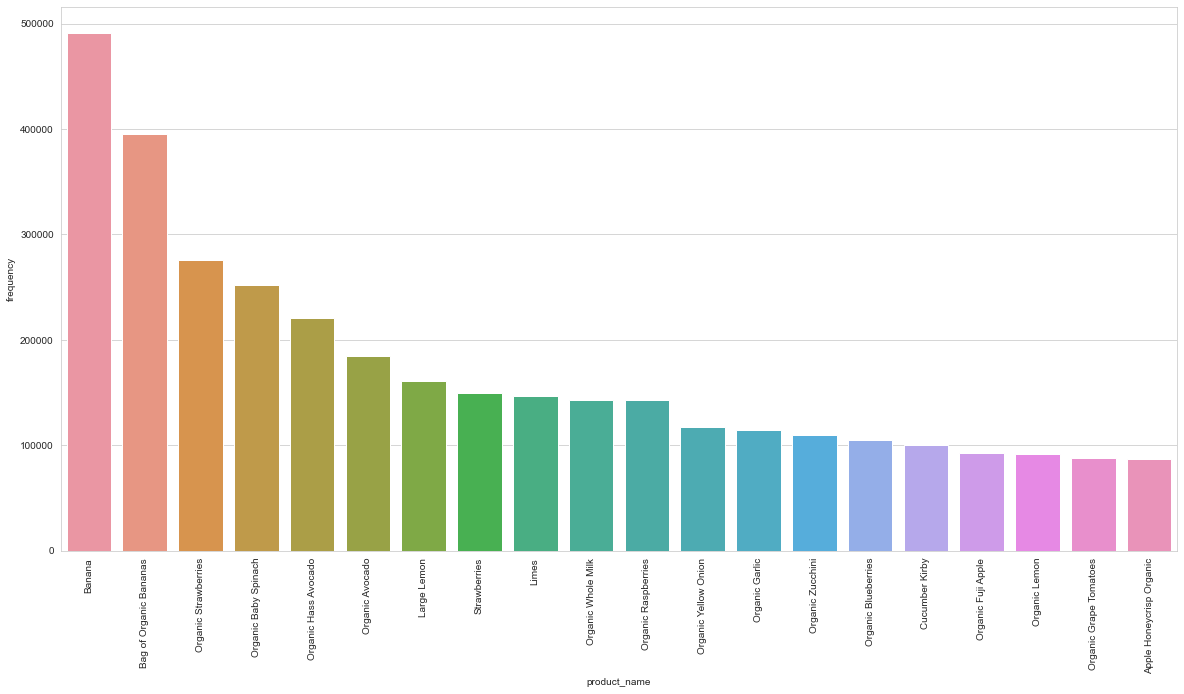

In [90]:
plt.figure(figsize=(20,10))
sns.barplot(x='product_name',y='frequency',data=reordered_products)
plt.xticks(rotation='vertical')

In [ ]:
#From which aisle we got most orders/reorders

In [93]:
ordered_aisles=prior_train_orders['aisle'].value_counts().reset_index().head(20)
ordered_aisles.columns=['aisle_name','no_of_products_ordered']
ordered_aisles

,aisle_name,no_of_products_ordered
0,fresh fruits,3792661
1,fresh vegetables,3568630
2,packaged vegetables fruits,1843806
3,yogurt,1507583
4,packaged cheese,1021462
5,milk,923659
6,water seltzer sparkling water,878150
7,chips pretzels,753739
8,soy lactosefree,664493
9,bread,608469


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'fresh fruits'),
  Text(1, 0, 'fresh vegetables'),
  Text(2, 0, 'packaged vegetables fruits'),
  Text(3, 0, 'yogurt'),
  Text(4, 0, 'packaged cheese'),
  Text(5, 0, 'milk'),
  Text(6, 0, 'water seltzer sparkling water'),
  Text(7, 0, 'chips pretzels'),
  Text(8, 0, 'soy lactosefree'),
  Text(9, 0, 'bread'),
  Text(10, 0, 'refrigerated'),
  Text(11, 0, 'frozen produce'),
  Text(12, 0, 'ice cream ice'),
  Text(13, 0, 'crackers'),
  Text(14, 0, 'energy granola bars'),
  Text(15, 0, 'eggs'),
  Text(16, 0, 'lunch meat'),
  Text(17, 0, 'frozen meals'),
  Text(18, 0, 'baby food formula'),
  Text(19, 0, 'fresh herbs')])

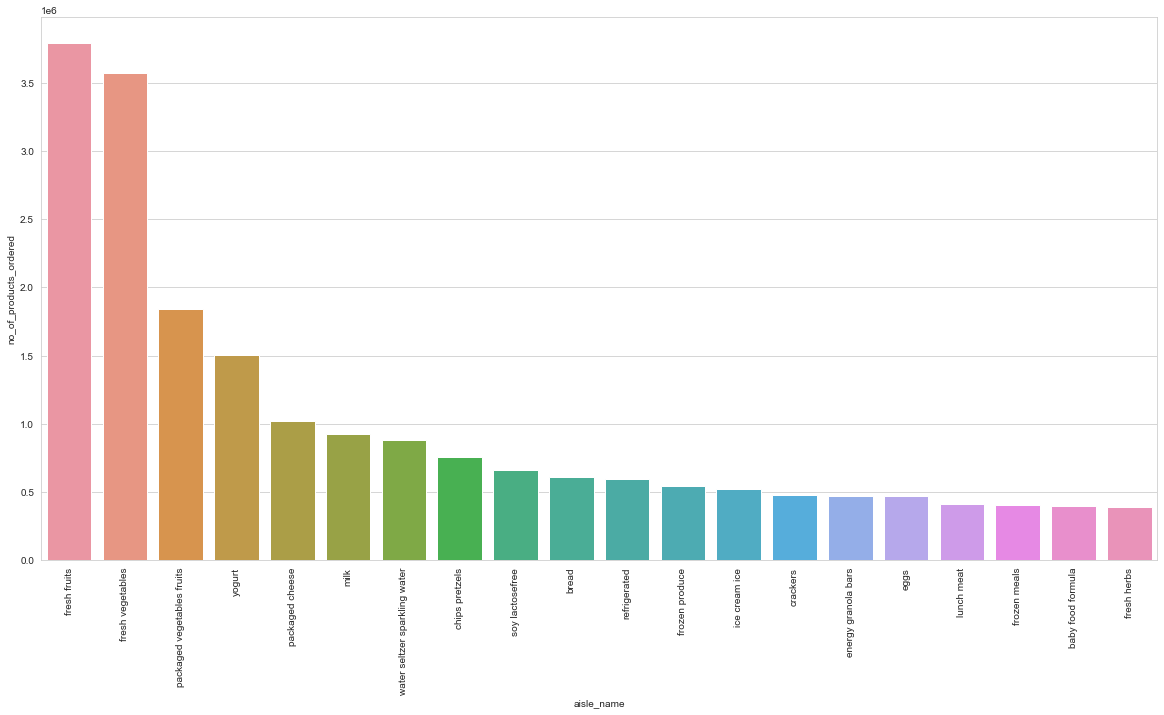

In [96]:
plt.figure(figsize=(20,10))
sns.barplot(x='aisle_name',y='no_of_products_ordered',data=ordered_aisles)
plt.xticks(rotation='vertical')

In [127]:
reordered_aisles=prior_train_orders.groupby(['aisle'])['reordered'].aggregate('sum').sort_values(ascending=False).reset_index().head(20)
reordered_aisles.columns=['aisle_name','no_of_products_reordered']


In [116]:
reordered_aisles['reordered_rate']= reordered_aisles['no_of_products_reordered']
                                     /ordered_aisles['no_of_products_ordered']

In [124]:
reordered_aisles.sort_values(by=['reordered_rate'], ascending=False, inplace=True)
reordered_aisles

,aisle_name,no_of_products_reordered,reordered_rate
0,fresh fruits,2726251,0.718823
4,milk,722128,0.706955
5,water seltzer sparkling water,640988,0.693966
3,yogurt,1034957,0.686501
6,packaged cheese,598280,0.681296
9,bread,408010,0.670552
8,chips pretzels,444036,0.668233
10,refrigerated,397213,0.663006
2,packaged vegetables fruits,1178700,0.639275
11,eggs,333408,0.611638


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'fresh fruits'),
  Text(1, 0, 'milk'),
  Text(2, 0, 'water seltzer sparkling water'),
  Text(3, 0, 'yogurt'),
  Text(4, 0, 'packaged cheese'),
  Text(5, 0, 'bread'),
  Text(6, 0, 'chips pretzels'),
  Text(7, 0, 'refrigerated'),
  Text(8, 0, 'packaged vegetables fruits'),
  Text(9, 0, 'eggs'),
  Text(10, 0, 'soy lactosefree'),
  Text(11, 0, 'lunch meat'),
  Text(12, 0, 'fresh vegetables'),
  Text(13, 0, 'energy granola bars'),
  Text(14, 0, 'baby food formula'),
  Text(15, 0, 'soft drinks'),
  Text(16, 0, 'frozen meals'),
  Text(17, 0, 'crackers'),
  Text(18, 0, 'frozen produce'),
  Text(19, 0, 'ice cream ice')])

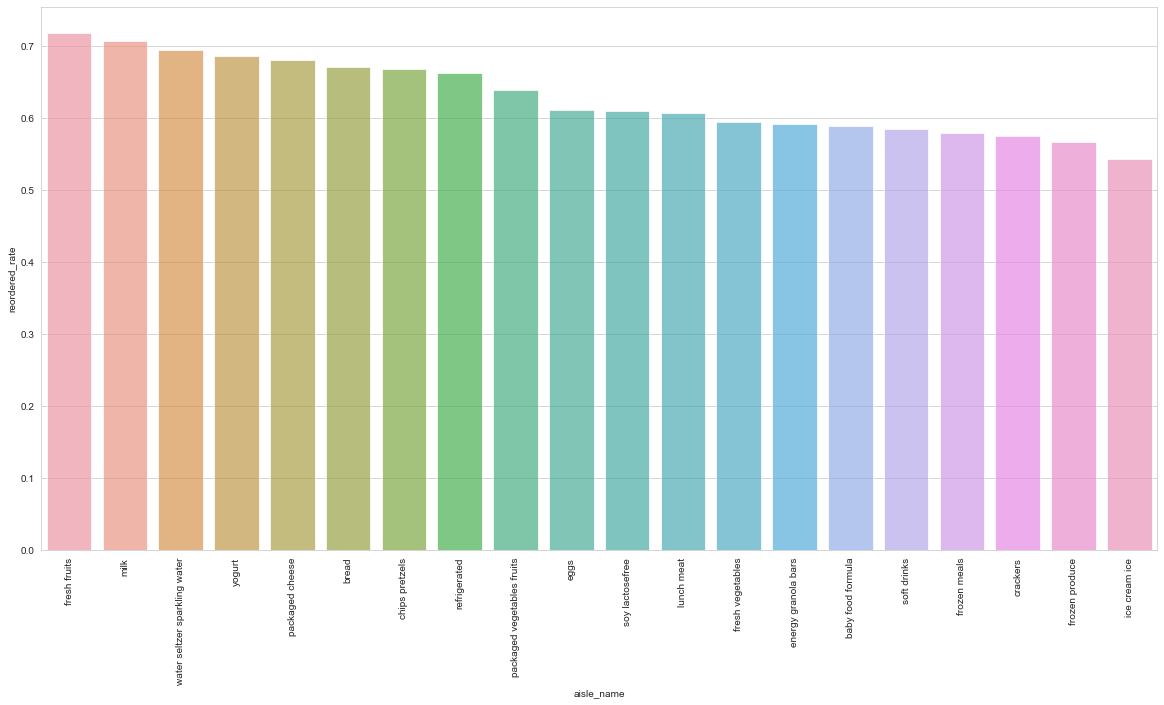

In [126]:
plt.figure(figsize=(20,10))
sns.barplot(x='aisle_name',y='reordered_rate',data=reordered_aisles, alpha=0.7)
plt.xticks(rotation='vertical')

**Most reorderes were placed from aisles Fresh fruits, milk, water etc.**

In [ ]:
#From which department we got most orders/reorders

In [97]:
ordered_departments=prior_train_orders['department'].value_counts().reset_index().head(20)
ordered_departments.columns=['department_name','no_of_products_ordered']
ordered_departments

,department_name,no_of_products_ordered
0,produce,9888378
1,dairy eggs,5631067
2,snacks,3006412
3,beverages,2804175
4,frozen,2336858
5,pantry,1956819
6,bakery,1225181
7,canned goods,1114857
8,deli,1095540
9,dry goods pasta,905340


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'produce'),
  Text(1, 0, 'dairy eggs'),
  Text(2, 0, 'snacks'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'frozen'),
  Text(5, 0, 'pantry'),
  Text(6, 0, 'bakery'),
  Text(7, 0, 'canned goods'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'household'),
  Text(11, 0, 'meat seafood'),
  Text(12, 0, 'breakfast'),
  Text(13, 0, 'personal care'),
  Text(14, 0, 'babies'),
  Text(15, 0, 'international'),
  Text(16, 0, 'alcohol'),
  Text(17, 0, 'pets'),
  Text(18, 0, 'missing'),
  Text(19, 0, 'other')])

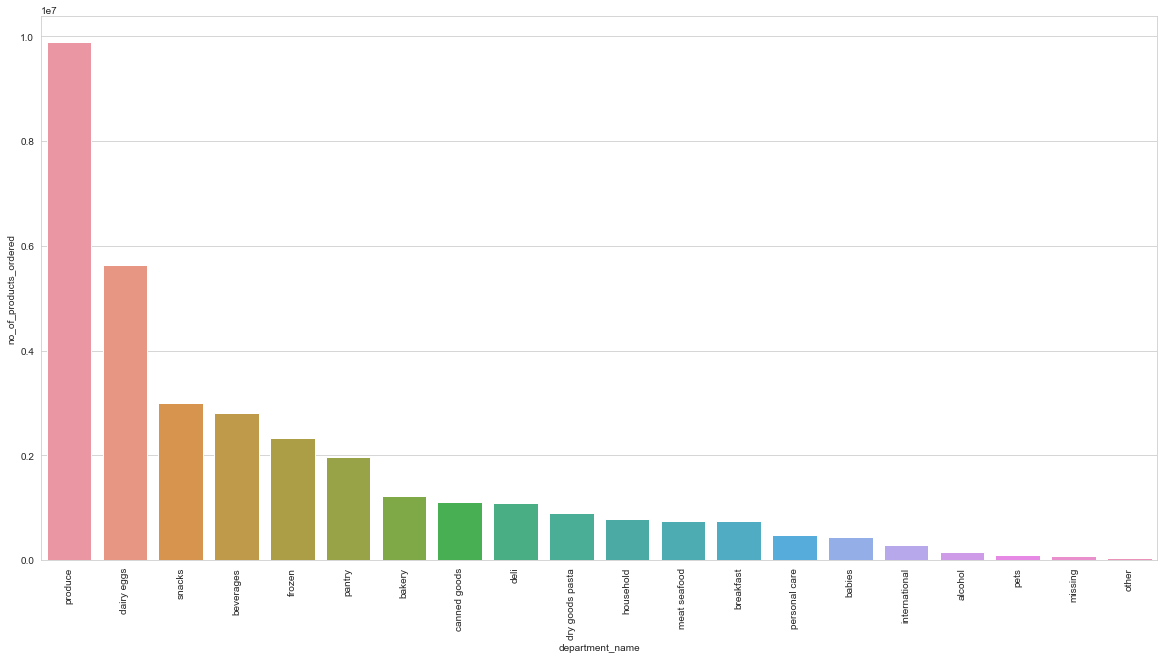

In [99]:
plt.figure(figsize=(20,10))
sns.barplot(x='department_name',y='no_of_products_ordered',data=ordered_departments)
plt.xticks(rotation='vertical')

Its clear from the graph above that most orders were placed from depatments- produce and dairy eggs. 

In [131]:
reordered_departments=prior_train_orders.groupby(['department'])['reordered'].aggregate('sum').sort_values(ascending=False).reset_index().head(20)
reordered_departments.columns=['department_name','no_of_products_reordered']

reordered_departments['reorder_rate']= reordered_departments['no_of_products_reordered']/ordered_departments['no_of_products_ordered']

reordered_departments.sort_values(by=['reorder_rate'], ascending=False, inplace=True)
reordered_departments

,department_name,no_of_products_reordered,reorder_rate
1,dairy eggs,3773723,0.670161
0,produce,6432596,0.650521
3,snacks,1727075,0.615894
2,beverages,1832952,0.609681
17,pets,61594,0.602557
7,deli,666231,0.597593
16,alcohol,90992,0.571221
11,breakfast,414877,0.561223
6,pantry,679799,0.554856
19,bulk,20736,0.544452


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'dairy eggs'),
  Text(1, 0, 'produce'),
  Text(2, 0, 'snacks'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'pets'),
  Text(5, 0, 'deli'),
  Text(6, 0, 'alcohol'),
  Text(7, 0, 'breakfast'),
  Text(8, 0, 'pantry'),
  Text(9, 0, 'bulk'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'babies'),
  Text(12, 0, 'dry goods pasta'),
  Text(13, 0, 'canned goods'),
  Text(14, 0, 'meat seafood'),
  Text(15, 0, 'household'),
  Text(16, 0, 'missing'),
  Text(17, 0, 'bakery'),
  Text(18, 0, 'international'),
  Text(19, 0, 'personal care')])

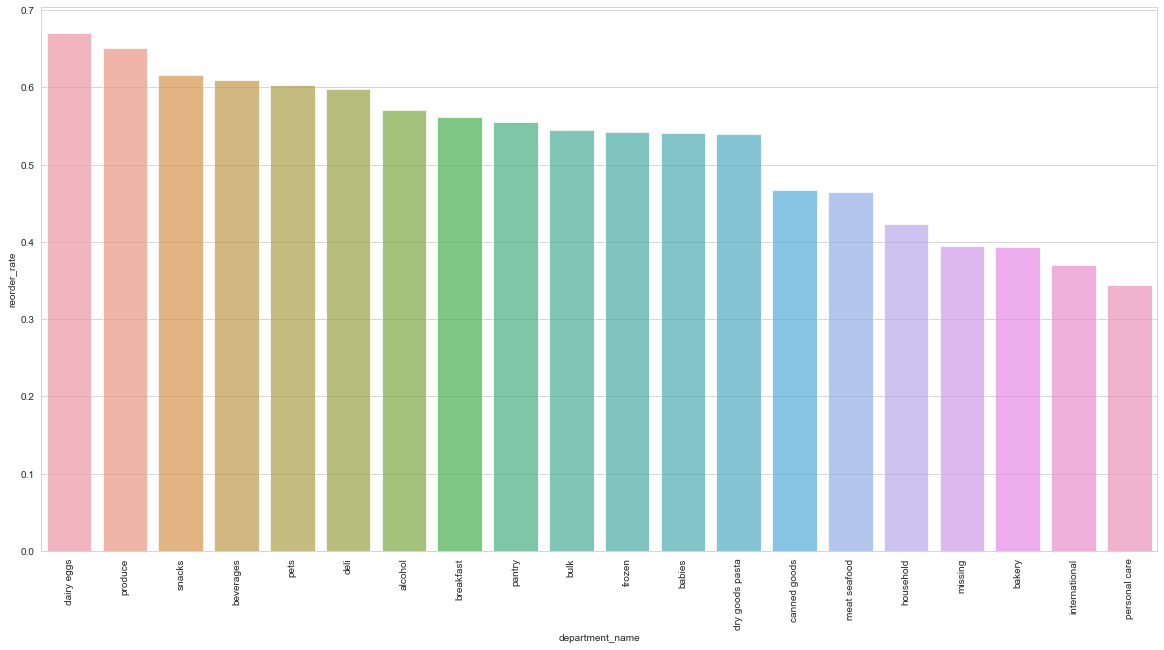

In [132]:
plt.figure(figsize=(20,10))
sns.barplot(x='department_name',y='reorder_rate',data=reordered_departments, alpha=0.7)
plt.xticks(rotation='vertical')

In [ ]:
#cartsize of different orders

In [101]:
cartsize=prior_train_orders['order_id'].value_counts().reset_index()
cartsize.columns=['order_id','no_of_products_in_order']
cartsize

,order_id,no_of_products_in_order
0,1564244,145
1,790903,137
2,61355,127
3,2970392,121
4,2069920,116
...,...,...
3346078,1187348,1
3346079,2898830,1
3346080,1919566,1
3346081,3203556,1


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

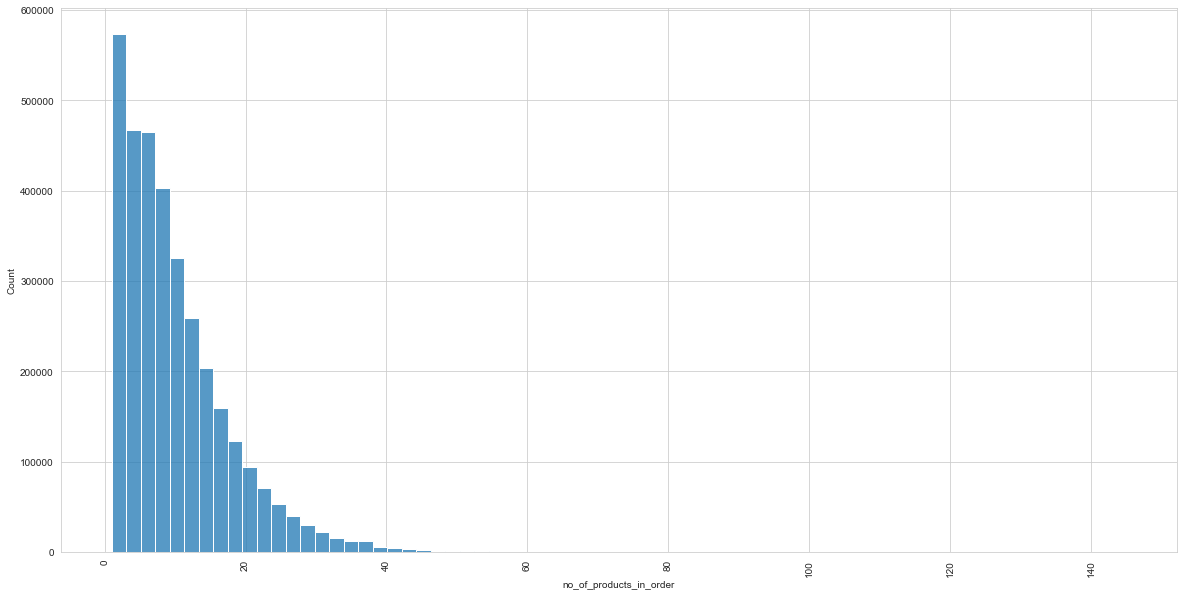

In [109]:
plt.figure(figsize=(20,10))
sns.histplot(x='no_of_products_in_order',data=cartsize,bins=70)
plt.xticks(rotation='vertical')

**Cart size has a right skewed distribution. and there are very few orders with cart size more than 40.maximum cart size is 145.**